In [27]:
import pandas as pd 
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/CS Course Enrollment Data.csv')

In [3]:
# assign id to each row
df['id'] = range(1, len(df) + 1)

In [36]:
# pivot table from wide to long
melted_df = pd.melt(df, id_vars=['Semester Admitted', 'Department', 'Major', 'id'], var_name='Class_Semester', value_name='Taken')

# filter out NaN rows
melted_df = melted_df.dropna(subset=['Taken', 'Department', 'Major'])

# split 'Class_Semester' into 'Class' and 'Semester'
melted_df[['Class', 'Semester_Type']] = melted_df['Class_Semester'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Class_Semester'])

# split Semester_Type into Pass or Tran
melted_df[['Type', 'Garbage']] = melted_df['Semester_Type'].str.split('_', n=1, expand=True)
melted_df = melted_df.drop(columns=['Garbage', 'Semester_Type'])

# split taken 
melted_df[['Taken_Semester', 'Taken_Year']] = melted_df['Taken'].str.rsplit(' ', n=1, expand=True)
melted_df = melted_df.drop(columns=['Taken'])

# remove semesters prior to Fall 2017
melted_df = melted_df[melted_df['Taken_Year'].astype(int) > 2016]
melted_df = melted_df[~((melted_df['Taken_Year'].astype(int) == 2017) & (melted_df['Taken_Semester'] == 'Spring'))]

# Display the first few rows to verify
melted_df.sort_values(by='id').head(10)

,Semester Admitted,Department,Major,id,Class,Type,Taken_Semester,Taken_Year
66386,Fall 2017,Mechanical Engineering,Mechanical Engineering,12,CSCI261,Pass,Spring,2018
66389,Fall 2017,Mechanical Engineering,Mechanical Engineering,15,CSCI261,Pass,Fall,2019
66390,Fall 2017,Physics,Engineering Physics,16,CSCI261,Pass,Spring,2018
16,Fall 2017,Mechanical Engineering,Mechanical Engineering,17,CSCI101,Pass,Fall,2018
17,Fall 2017,Mechanical Engineering,Mechanical Engineering,18,CSCI101,Pass,Spring,2020
73768,Fall 2017,Chemical & Biological Engineer,CHE-Biological Enginrng Spclty,19,CSCI261,Tran,Fall,2017
66394,Fall 2017,Mechanical Engineering,Mechanical Engineering,20,CSCI261,Pass,Fall,2019
66395,Fall 2017,Electrical Engineering,EE-Info Sys & Science Spclty,21,CSCI261,Pass,Spring,2019
21,Fall 2017,Physics,Engineering Physics,22,CSCI101,Pass,Fall,2017
66397,Fall 2017,Civil & Environmental Enginrng,Civil Engineering,23,CSCI261,Pass,Spring,2018


# Validation

In [37]:
print("DEPARTMENTS:")
print("\t", melted_df['Department'].unique(), '\n')

print("MAJORS:")
print("\t", melted_df['Major'].unique(), '\n')

print("CLASSES:")
print("\t", melted_df['Class'].unique(), '\n')

print("SEMESTERS:")
print("\t", melted_df['Taken_Year'].unique(), '\n')

DEPARTMENTS:
	 ['Mechanical Engineering' 'Physics' 'Economics and Business'
 'Civil & Environmental Enginrng' 'Chemistry'
 'Chemical & Biological Engineer' 'Geophysics'
 'Engineering Design & Society' 'Electrical Enginrg & Comp Sci'
 'Metallurgical & Materials Eng' 'Geo & Geological Engineering'
 'Undecided' 'Computer Science' 'Electrical Engineering' 'Petroleum'
 'Applied Math & Statistics' 'Mining' 'Interdisciplinary Program'
 'Non-Degree Program Undergrad' 'Honors' 'Non-Degree Program Grad Level'
 'Humanities Arts Social Science' 'Engineering'
 'Environ Science & Engineering'] 

MAJORS:
	 ['Mechanical Engineering' 'Engineering Physics' 'Economics - Business'
 'Environmental Engineering' 'Biochemistry'
 'CHE-Biological Enginrng Spclty' 'Geophysical Engineering'
 'EG-Individualized Spclty' 'Civil Engineering' 'Electrical Engineering'
 'Engineering & Tech Management' 'Metallurgical & Materials Eng'
 'Geological Engineering - GTch' 'Chemical Engineering' 'Undecided'
 'Computer Science' 

KeyError: 'Taken'

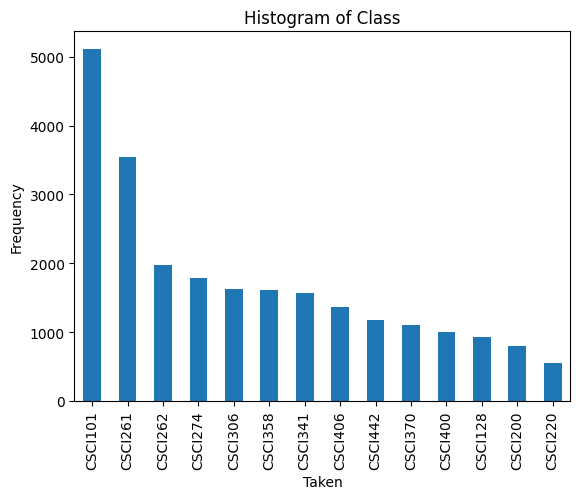

In [29]:
# plot histogram of different Taken 
melted_df['Class'].value_counts().plot(kind='bar')
plt.title('Histogram of Class')
plt.xlabel('Taken')
plt.ylabel('Frequency')
plt.show()
